In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

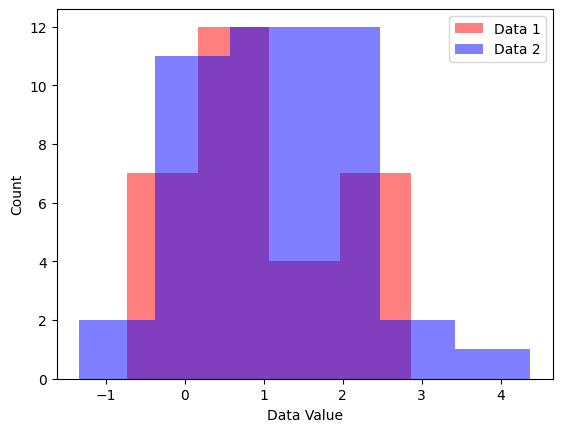

In [2]:
# generate the data

# parameters
n1 = 30     # Samples in dataset 1
n2 = 40     # Samples in dataset 2
mu1 = 1     # population mean in dataset 1
mu2 = 1.2   # population mean in dataset 2

# generating the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

# show their histograms
plt.hist(data1, bins='fd', color=[1, 0, 0, .5], label='Data 1')
plt.hist(data2, bins='fd', color=[0, 0, 1, .5], label='Data 2')
plt.xlabel('Data Value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [3]:
# now for the t-test

t, p = stats.ttest_ind(data1, data2, equal_var=True)

df = n1+n2-2
print('t(%g) = %g, p = %g'%(df, t, p))

t(68) = -0.811652, p = 0.419824


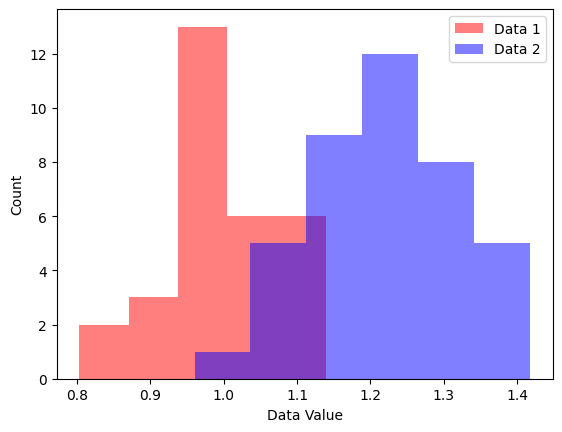

In [4]:
# generate the data

# parameters
n1 = 30     # Samples in dataset 1
n2 = 40     # Samples in dataset 2
mu1 = 1     # population mean in dataset 1
mu2 = 1.2   # population mean in dataset 2

# generating the data
data1 = mu1 + np.random.randn(n1)/10
data2 = mu2 + np.random.randn(n2)/10

# show their histograms
plt.hist(data1, bins='fd', color=[1, 0, 0, .5], label='Data 1')
plt.hist(data2, bins='fd', color=[0, 0, 1, .5], label='Data 2')
plt.xlabel('Data Value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [5]:
# now for the t-test

t, p = stats.ttest_ind(data1, data2, equal_var=True)

df = n1+n2-2
print('t(%g) = %g, p = %g'%(df, t, p))

t(68) = -9.92726, p = 7.35529e-15


In [6]:
# now for the t-test

t, p = stats.ttest_ind(data1, data2, equal_var=False)

df = n1+n2-2
print('t(%g) = %g, p = %g'%(df, t, p))

t(68) = -10.1997, p = 2.72638e-15


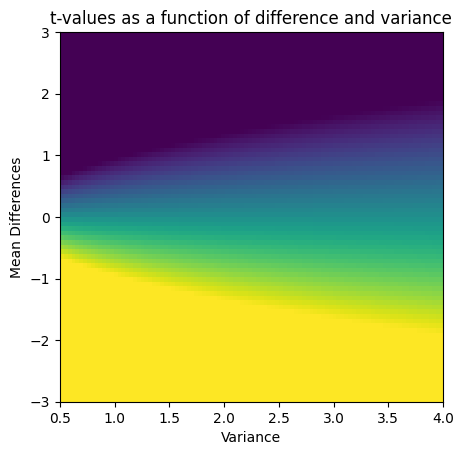

In [7]:
# a 2D space of t values

# ranges for t-value parameters
meandiffs = np.linspace(-3, 3, 80)
pooledvar = np.linspace(.5, 4, 100)

# group sample size
n1 = 40
n2 = 30

# initialize output matrix
allTvals = np.zeros((len(meandiffs), len(pooledvar)))

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):

        # t-value denominator
        df = n1 + n2 - 2
        s = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari]) / df)
        t_den = s * np.sqrt(1/n1 + 1/n2)

        # t-value in the matrix
        allTvals[meani, vari] = meandiffs[meani] / t_den

plt.imshow(allTvals, vmin=-4, vmax=4, extent=[pooledvar[0], pooledvar[-1], meandiffs[0], meandiffs[-1]], aspect=9/16)
plt.xlabel('Variance')
plt.ylabel('Mean Differences')
plt.title('t-values as a function of difference and variance')
plt.show()